### Fill in your name, student id number and email address
#### name: Lauri Reima
#### student id:  2109673
#### email: loreim@utu.fi

## Data analysis and knowledge discovery - Exercise 3: Unsupervised learning

This is the template for the third exercise. The purpose of this exercise is to familiarize yourself with the basics of unsupervised learning by using the agglomerative hierarchical clustering and k-means clustering algorithms to find patterns.

This exercise uses the wine dataset, available on moodle as `ex3_wine.csv`. The features are all numeric. They quantify chemical properties of wine, grown around the same area in Italy. The feature names are listed in the table below.

| Feature | Type 
| :--- | ---: 
| Alcohol | Numeric (float)
| Malic acid | Numeric (float)
| Ash | Numeric (float)
| Alcalinity of ash | Numeric (float)
| Magnesium | Numeric (integer)
| Total phenols | Numeric (float)
| Flavanoids | Numeric (float)
| Nonflavanoid phenols | Numeric (float)
| Proanthocyanins | Numeric (float)
| Color intensity | Numeric (float)
| Hue | Numeric (float)
| OD280/OD315 of diluted wines | Numeric (float)
| Proline | Numeric (integer)


In real applications, visualizing various aspects of the data the data and data scrubbing are important steps. However, in this exercise you can treat the data as given, and focus on the unsupervised methods.

Please consider the following things when returning your notebook:

 - As in the two previous exercises, the grading scale is failed/passed/passed with honors.
 - **For a passing grade, Parts 1-3 must be complete**, and all questions in each of them should be answered. Some mistakes are allowed as long as you clearly attempt to solve all the exercises.
 - For completing Parts 1-3 and the optional bonus Part 4 sufficiently well, you will be awarded one bonus point for the exam.
 - All the cells in the finished notebook should run without crashing. Please delete unnecessary cells. As a good rule of thumb, use **"Restart Kernel and Run All Cells"** on your finished notebook to make sure it runs without errors and produces the expected output.
 - Comment your code to explain how it works and what you intend for it to do.
 - Answer the questions asked in the assignments in Markdown cells.
 - If you're having trouble with this exercise, try an online search first, but **don't just copy-paste code you find**. See exercise guidelines in the Moodle page of this course. If you can't find a solution to your problem, **ask for advice at the exercise sessions** or in the course discussion forum on Moodle or email oskari.s.heikkinen@utu.fi.
 - If/when you look things up during this exercise, please **cite your sources**, e.g. a link to a web page. It's better to cite too much than too little.
 - **We don't encourage using a large language model (LLM) such as ChatGPT while doing these exercises.** However, if you do use an LLM, be critical of its output. Understand any code the LLM produced before using the code, don't just copy-paste it. If you used one, write a short description of how you used the LLM in the context of these exercises (what was your input, how did you benefit from the output?)

### Library imports, Jupyter Notebook settings etc.

The below libraries are sufficient to complete the exercise. You can import additional modules here if you want.

In [1]:
import itertools # has some utilities that may be useful in the exercise

import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

# IPython magic command to display matplotlib figures together with the output
# (Often the default setting in a Jupyter Notebook context, so your figures probably work fine without it)
%matplotlib inline

### Part 0: Read the data

- Download the exercise 3 data on the Moodle page of this course. (`ex3_wine.csv`)
- Read the data into a Pandas dataframe.
- Display a few rows and some basic information to make sure the data was loaded correctly

In [2]:
data_path = 'ex3_wine.csv' 
wine_data = pd.read_csv(data_path)
print(wine_data.shape)
wine_data.head(5)

(178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Part 1: Preprocess and visualize the data

 - Perform z-score standardization on the features to ensure that all features have the same scale.
 - Project the data to two dimensions by using principal component analysis (PCA) and visualize the resulting two-dimensional data in a scatter plot. Don't color the scatter plot yet.
 - Does it look like there are clear clusters? Don't worry if they're hard to see. There may be more than one "correct" answer.
 - Draw shapes (for example `matplotlib.patches.Ellipse`) on top of the scatter plot to visualize any clusters you feel you can easily detect.

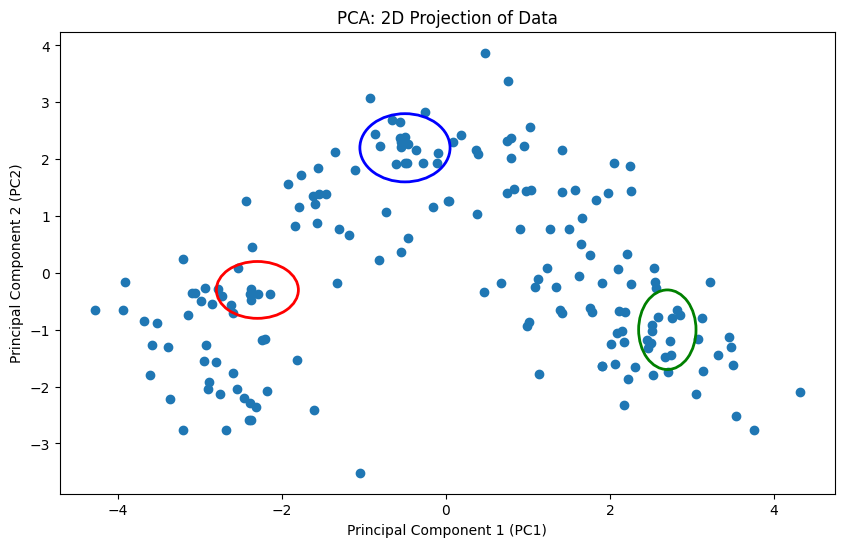

In [3]:
# Extract numerical columns for standardization
numerical_columns = wine_data.select_dtypes(include=['float64', 'int64']).columns

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data using the scaler for numerical columns
stan_wine = pd.DataFrame(scaler.fit_transform(wine_data[numerical_columns]),columns=numerical_columns)

# Initialize the PCA with 2 components for 2D projection
pca = PCA(n_components=2)

# Fit and transform the data using PCA
pca_wine = pca.fit_transform(stan_wine[numerical_columns])

# Create a DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_wine, columns=['PC1', 'PC2'])

# Visualize the two-dimensional data in a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.title('PCA: 2D Projection of Data')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')

# Draw ellipses or other shapes to represent clusters
ellipse1 = Ellipse((-2.3, -0.3), width=1, height=1, edgecolor='r', facecolor='none', linewidth=2)
ellipse2 = Ellipse((-0.5, 2.2), width=1.1, height=1.2, edgecolor='b', facecolor='none', linewidth=2)
ellipse3 = Ellipse((2.7, -1), width=0.7, height=1.4, edgecolor='g', facecolor='none', linewidth=2)

# Add ellipses to the plot
plt.gca().add_patch(ellipse1)
plt.gca().add_patch(ellipse2)
plt.gca().add_patch(ellipse3)

plt.show()

In [4]:
numerical_columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

### Part 2a: Agglomerative hierarchical clustering
 
 - Cluster the data into 2-10 clusters using agglomerative hierarchical clustering.
 - Try different values for the linkage parameter. (Ward, Single, Average and Complete)
 - Use the z-score standardized 13-dimensional data for clustering - **don't use the first two principal components for clustering!**
 - Explain why using the two principal components would be a bad idea for clustering.
 - Using silhouette score, evaluate the clustering performance for each linkage criterion and number of clusters combination. Sort the results by silhouette score.
 - Plot the data into a scatter plot again, this time colouring the data points according to the cluster they were assigned to. Use the best 6 clusterings according to silhouette score.
 - Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.


*Tip: you can use `itertools.product` function to get the Cartesian product of the two lists of hyperparameters (number of clusters, linkage criterion)*

*Note: it's a common mistake to think that the points in the scatter plot should move when clustering, but they should not. Clustering can be visualized simply by colouring data points on an existing plot.*

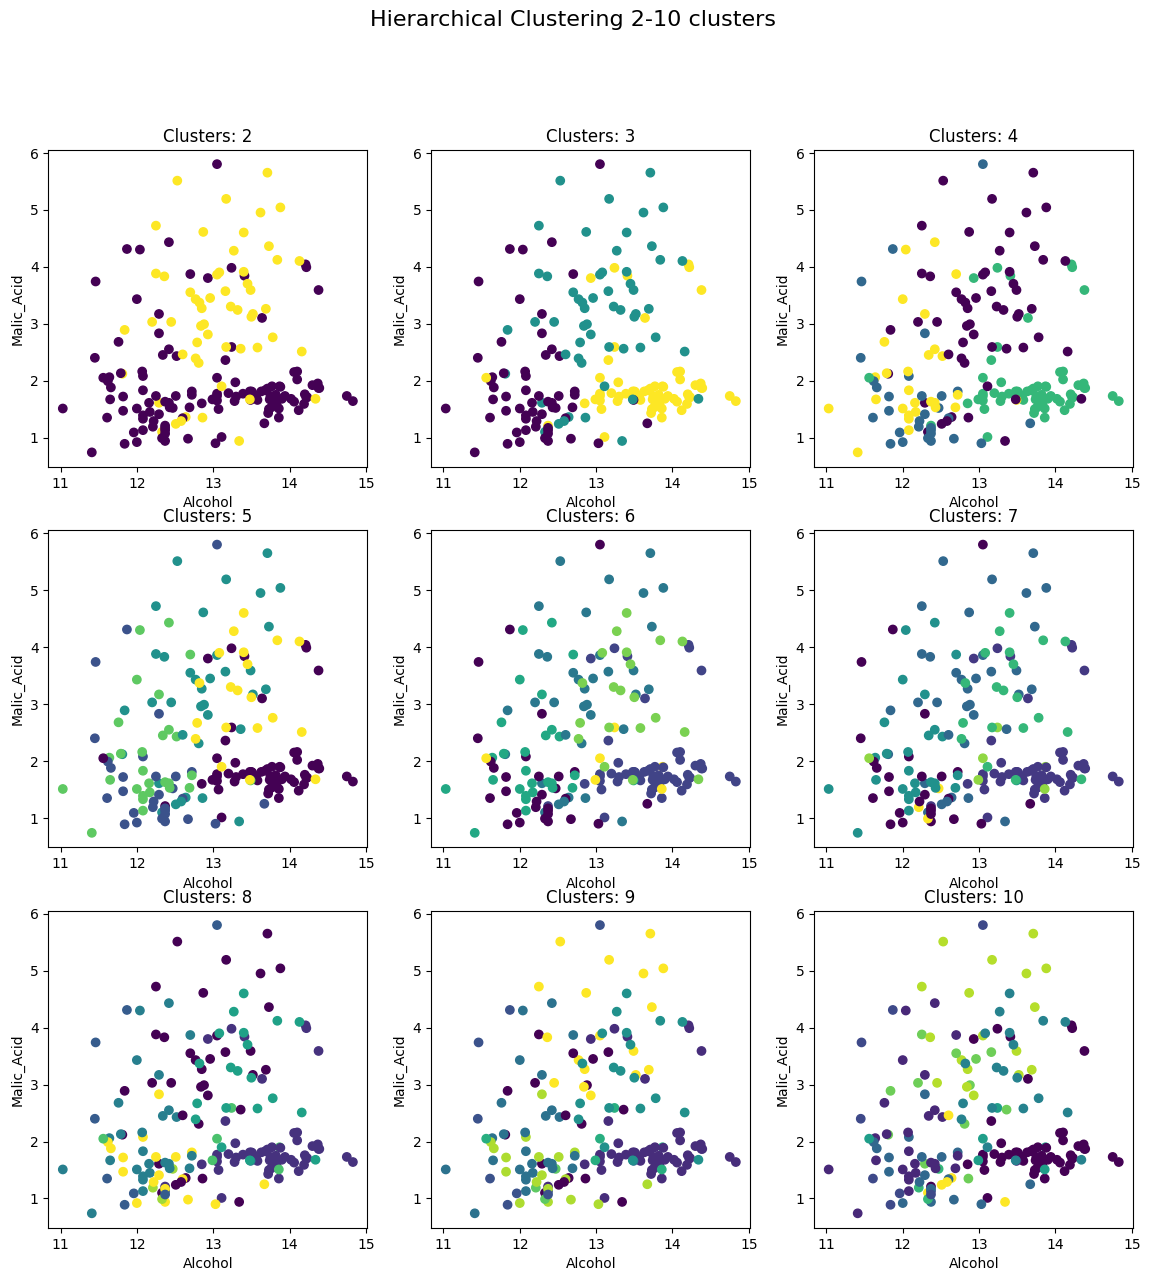

In [5]:
# hierarchical clustering for 2 to 10 clusters
cluster_range = range(2, 11)

# 3x3 plots
fig, axes = plt.subplots(3, 3, figsize=(14, 14))
axes = axes.flatten()
# i to index and n_clusters the cluster size
for i, n_clusters in enumerate(cluster_range):
    # perform clustering
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    wine_data['cluster'] = clustering.fit_predict(stan_wine)
    # indexing plots
    ax = axes[i]
    ax.scatter(wine_data[numerical_columns[0]], wine_data[numerical_columns[1]], c=wine_data['cluster'], cmap='viridis')
    ax.set_title(f'Clusters: {n_clusters}')
    ax.set_xlabel(numerical_columns[0])
    ax.set_ylabel(numerical_columns[1])
plt.suptitle(f'Hierarchical Clustering 2-10 clusters', fontsize=16)
plt.show()

Text(0.5, 0.98, 'Hierarchical Clustering with different methods')

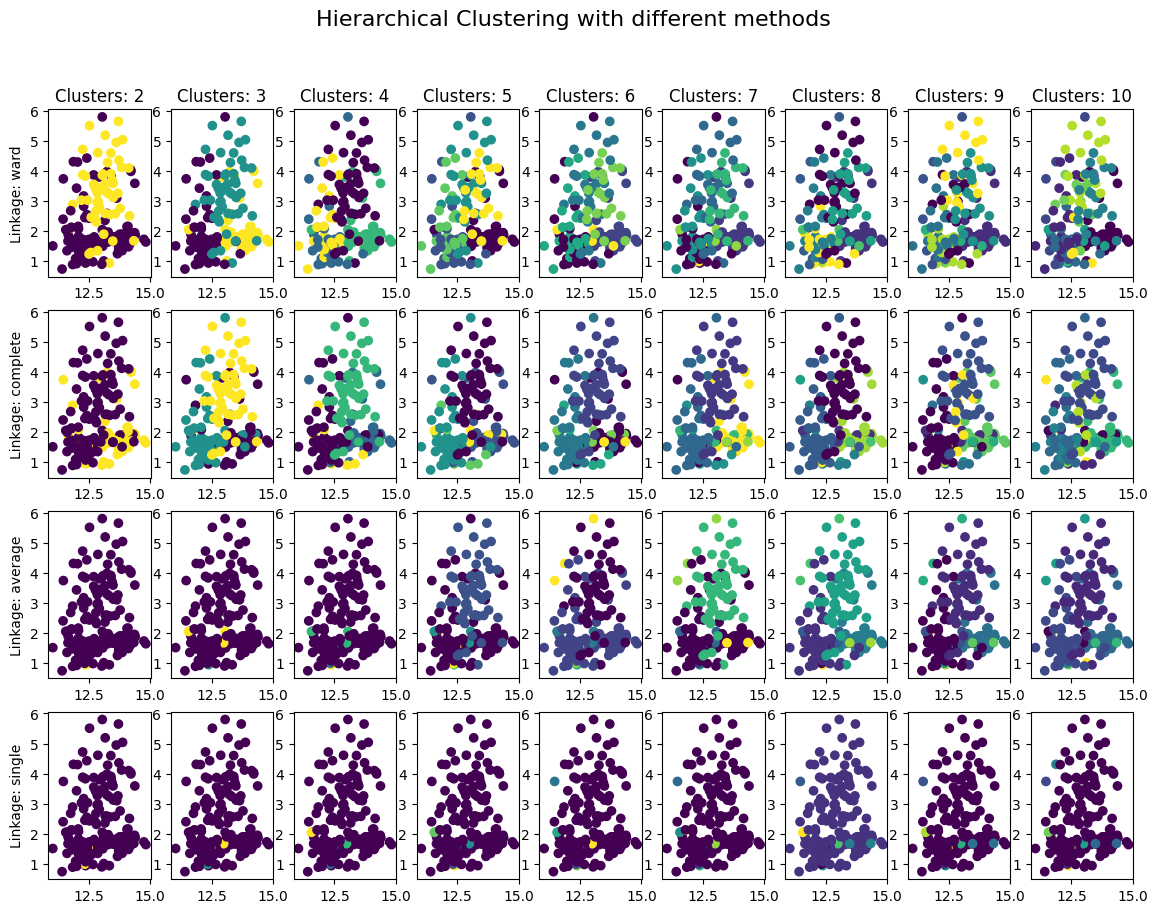

In [6]:
linkage_methods = ['ward', 'complete', 'average', 'single']  # You can choose the linkage method that suits your data

# Create a 4x9 subplot grid
fig, axes = plt.subplots(4, 9, figsize=(14, 10))
axes = axes.flatten()

# Create a list to store silhouette scores and corresponding configurations
silhouette_scores = []

for i, linkage_method in enumerate(linkage_methods):
    for j, n_clusters in enumerate(cluster_range):
        # clustering
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        wine_data['cluster'] = clustering.fit_predict(stan_wine)

        # Calculate silhouette score
        score = silhouette_score(stan_wine, wine_data['cluster'])
        silhouette_scores.append({
            'Linkage': linkage_method,
            'Clusters': n_clusters,
            'Silhouette': score
        })
        # using indecies to plot into  sublpot 
        ax = axes[i * 9 +j]
        ax.scatter(wine_data['Alcohol'],wine_data['Malic_Acid'], c=wine_data['cluster'], cmap='viridis' )
        #setting title to just the first row
        if i == 0:
            ax.set_title(f'Clusters: {n_clusters}')
        # just labeling the most left plot
        if j== 0:
            ax.set_ylabel(f'Linkage: {linkage_method}')
plt.suptitle(f'Hierarchical Clustering with different methods', fontsize=16)


Text(0.5, 0.98, 'Clustering of 6 best performers according to silhouette score')

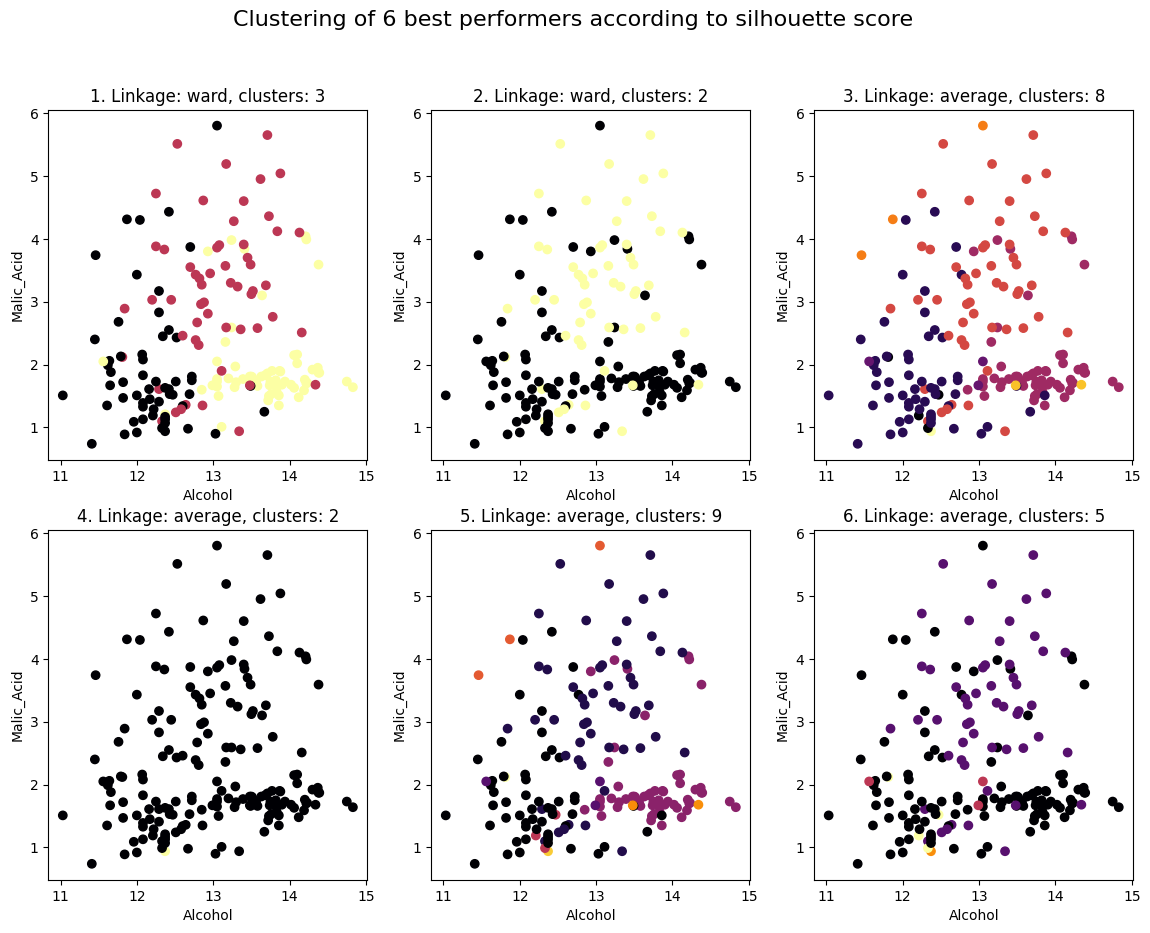

In [7]:
# putting sihouette values in Dtaframe and sorting it
sil_df = pd.DataFrame(silhouette_scores).sort_values(by='Silhouette', ascending=False)
# six best sihouette scores
best_ones = pd.Series(sil_df.head(6).index)

fig, axes = plt.subplots(2, 3, figsize=(14, 10))
axes = axes.flatten()

for i, linkage_method in enumerate(linkage_methods):
    for j, n_clusters in enumerate(cluster_range):
        
        clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
        wine_data['cluster'] = clustering.fit_predict(stan_wine)

        iter_val = i * 9 + j
        # plotting if it is in the best six
        if iter_val in best_ones.values:
            ax = axes[best_ones[best_ones == iter_val].index[0]]
            ax.scatter(wine_data['Alcohol'],wine_data['Malic_Acid'], c=wine_data['cluster'], cmap='inferno' )
            ax.set_title(f'{best_ones[best_ones == iter_val].index[0] + 1}. Linkage: {linkage_method}, clusters: {n_clusters}')
            ax.set_xlabel('Alcohol')
            ax.set_ylabel('Malic_Acid')

plt.suptitle(f'Clustering of 6 best performers according to silhouette score', fontsize=16)

Explain why using the two principal components would be a bad idea for clustering.

Using only two principal components for clustering may not be ideal if most of the variance is not captured by these components, leading to potential loss of valuable information in other dimensions. PCA captures linear relationships between variables, potentially missing non-linear patterns in the original data.

Do some of the clusterings discovered by agglomerative hierarchical clustering correspond to what visually looked like clusters to you in Part 1? It's absolutely fine if they don't.

I dont find too many similarities in the plots. There are three distinctive clusters, but thats about it


### Part 2b: Dendrograms

 - Plot dendrograms to visualize the merging processes.
 - For this you will need a linkage matrix. *Hint: while you can extract one from a fitted AgglomerativeClustering object, it is much easier to use the scipy implementation (`scipy.cluster.hierarchy.linkage`).*
 - Compute the linkage matrix using Ward and Single linkage, and plot the dendrograms using `scipy.cluster.hierarchy.dendrogram`.
 - Truncate the dendrogram for better readability. You may choose how exactly you want to do the truncation.
 - How do you interpret the dendrograms? How do they differ?

*Note: when truncating a dendrogram, a number in parentheses refers to the amount of samples in a subtree. A number without parentheses is the index of a single sample*

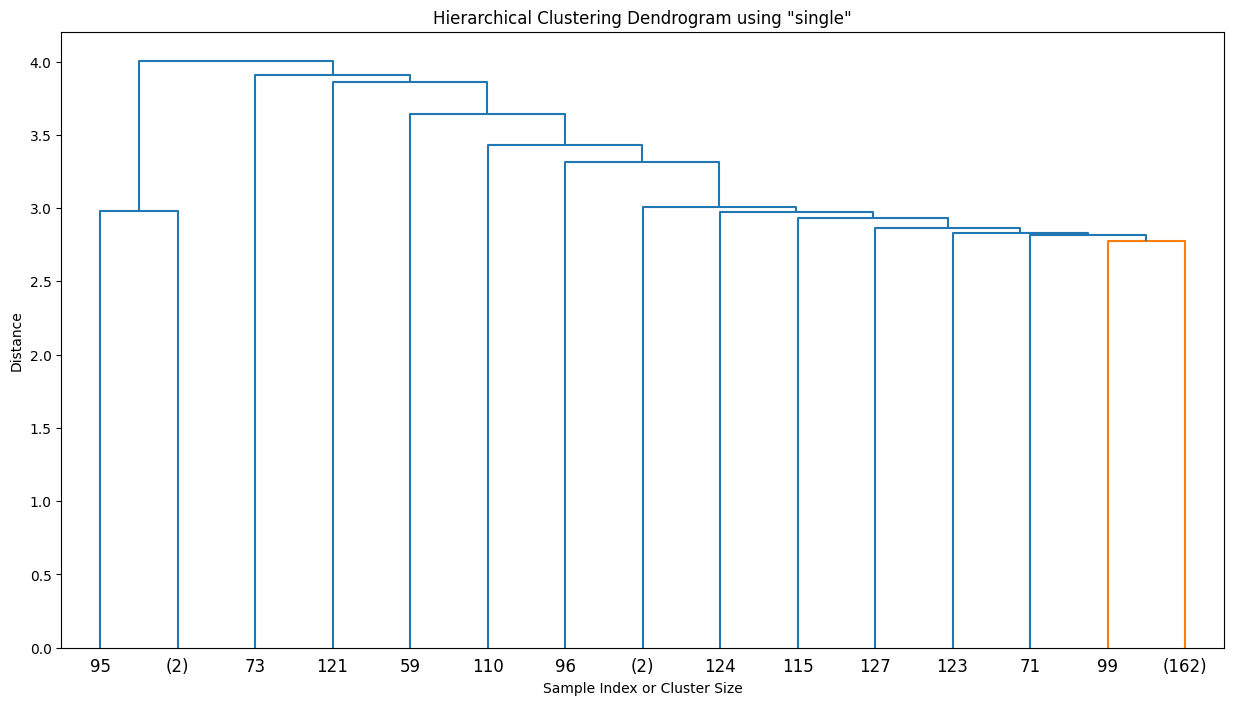

In [8]:
# Perform hierarchical clustering
linked = linkage(stan_wine, 'single')

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linked, truncate_mode='lastp', p=15)
plt.title('Hierarchical Clustering Dendrogram using "single"')
plt.xlabel('Sample Index or Cluster Size')
plt.ylabel('Distance')
plt.show()

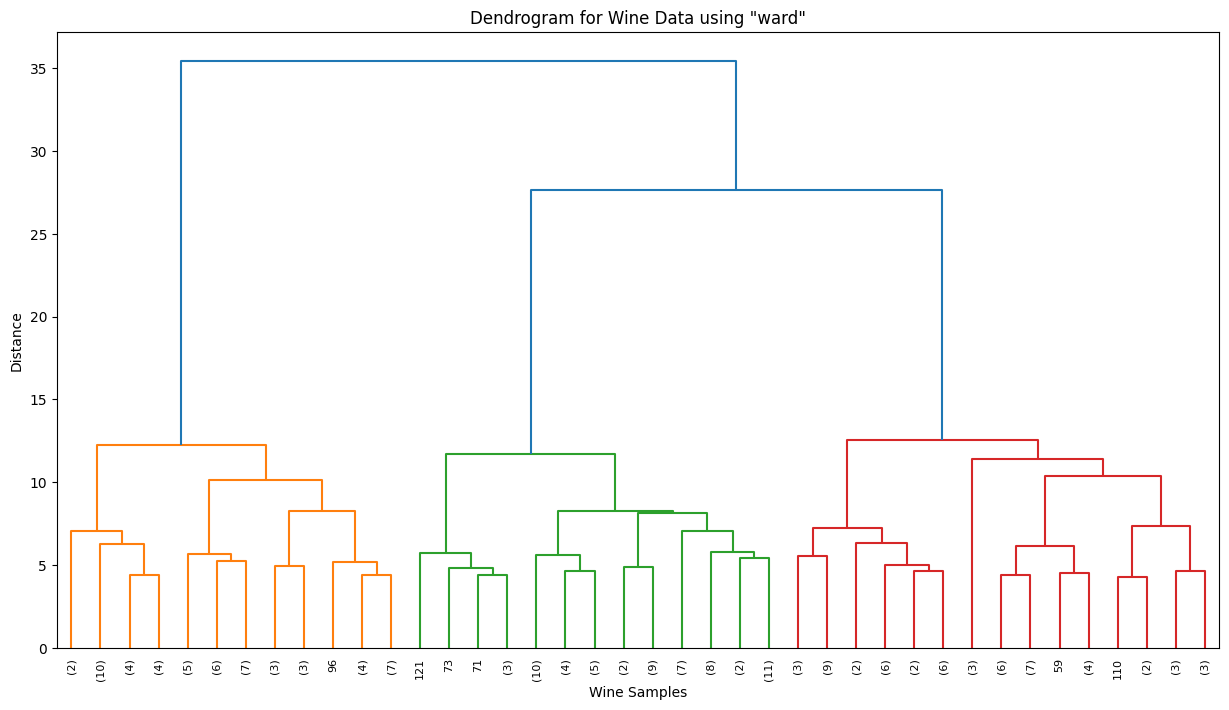

In [9]:
# Perform hierarchical clustering on the standardized data
linkage_matrix = linkage(stan_wine, method='ward')  # You can choose a different linkage method if needed

# Plot the dendrogram
plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, labels=wine_data.index, leaf_rotation=90, truncate_mode='lastp', p=40)
plt.title('Dendrogram for Wine Data using "ward"')
plt.xlabel('Wine Samples')
plt.ylabel('Distance')
plt.show()

How do you interpret the dendrograms? How do they differ?

The distance is represented on the y-axis and each vertical line is the distance between two clusters.

In the single method the distances are quite short between 'clusters', but the biggest cluster is still quite far away.

In the ward method there are bigger clusters that seem to be further away from each other

### Part 3: _k_-means clustering

 - Perform _k_-means clustering on the data. Try 2-10 numbers of clusters.
 - Evaluate the clustering performance using silhouette score.
 - Choose the best 3 numbers of clusters according to silhouette score that you discovered above, and once again visualize them on a scatter plot of the first two principal components.
 - Display the centroids of the clusters on the plot. Remember to transform the centroids to the PCA space. Explain why you need to transform the centroids.

Text(0.5, 0.98, 'k_means clustering with k=2...10')

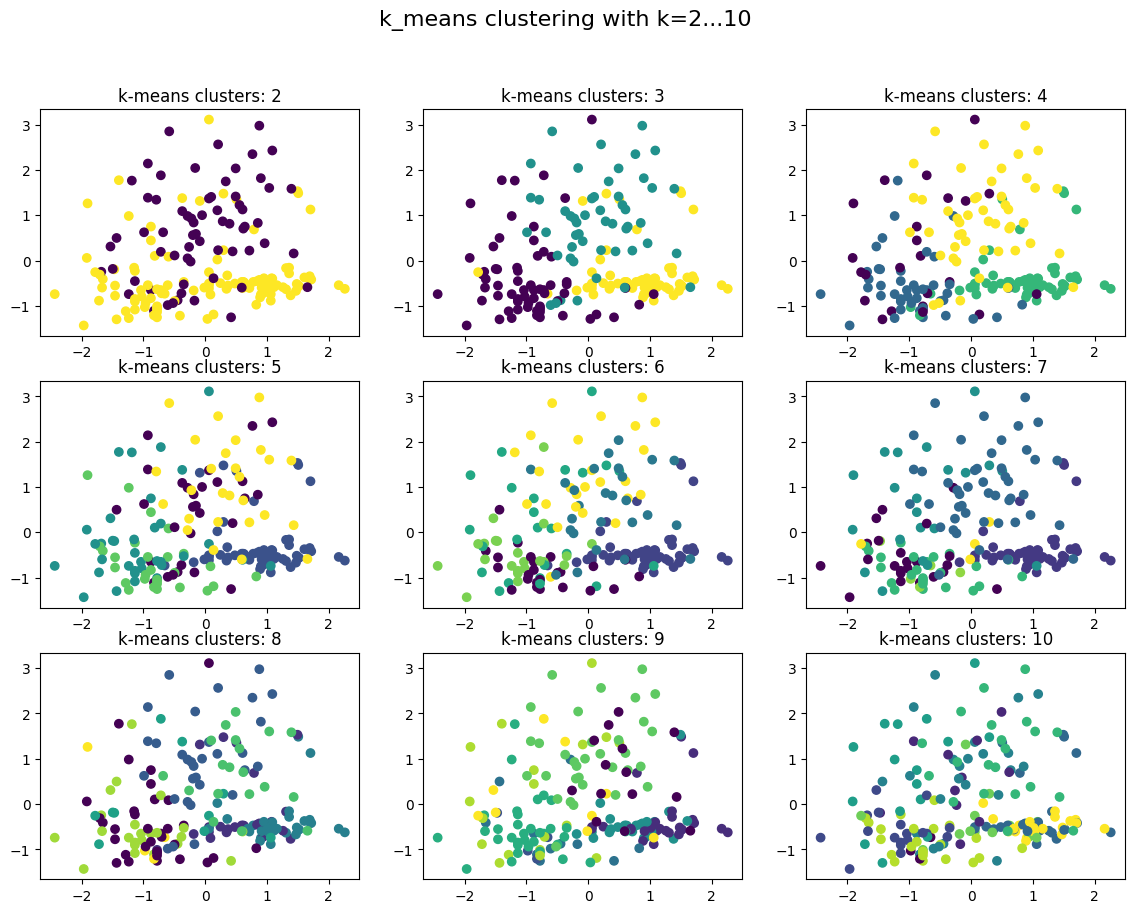

In [10]:
k_values = range(2,11)
fig, axes = plt.subplots(3, 3, figsize=(14, 10))
axes = axes.flatten()
sil_scores = []
for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(stan_wine)
    predictions = kmeans.predict(stan_wine)

    # Calculate silhouette score
    score = silhouette_score(stan_wine, predictions)
    sil_scores.append({
        'Predictions': predictions,
        'Clusters': k,
        'Silhouette': score
        })
    # used ax to plot each subplot
    ax = axes[i]
    ax.scatter(stan_wine['Alcohol'], stan_wine['Malic_Acid'], c=predictions, cmap='viridis')
    ax.set_title(f'k-means clusters: {k}')
plt.suptitle('k_means clustering with k=2...10', fontsize=16)

Text(0.5, 0.98, 'k_means clustering with best performers in sihouette scoring')

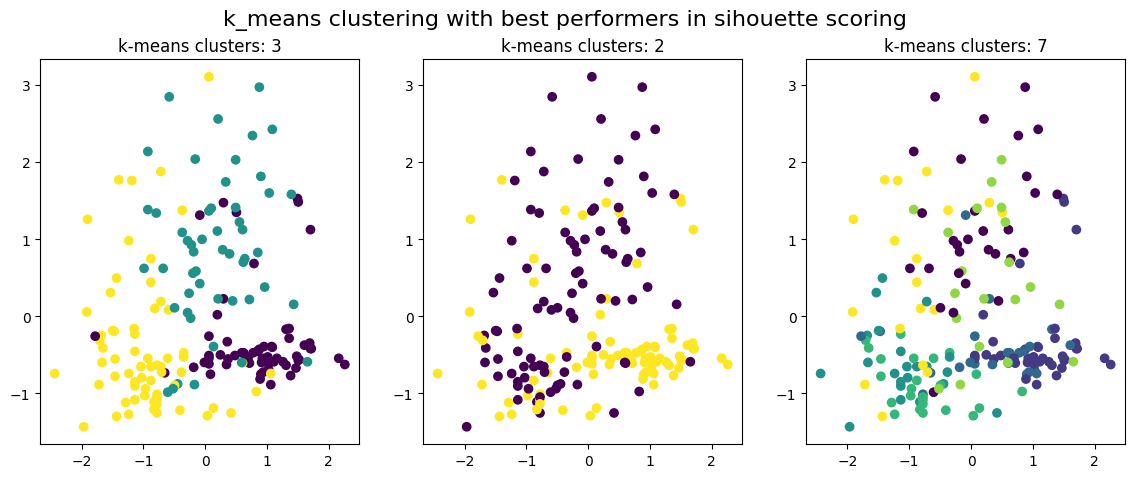

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(14, 5))
axes = axes.flatten()
sil_data = pd.DataFrame(sil_scores).sort_values(by='Silhouette', ascending=False).head(3)

for i, k in enumerate(sil_data['Clusters']):
    kmeans = KMeans(n_clusters=k, n_init=10).fit(stan_wine)
    predictions = kmeans.predict(stan_wine)

    ax = axes[i]
    ax.scatter(stan_wine['Alcohol'], stan_wine['Malic_Acid'], c=predictions, cmap='viridis')
    ax.set_title(f'k-means clusters: {k}')
plt.suptitle('k_means clustering with best performers in sihouette scoring', fontsize=16) 

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but PCA was fitted with f

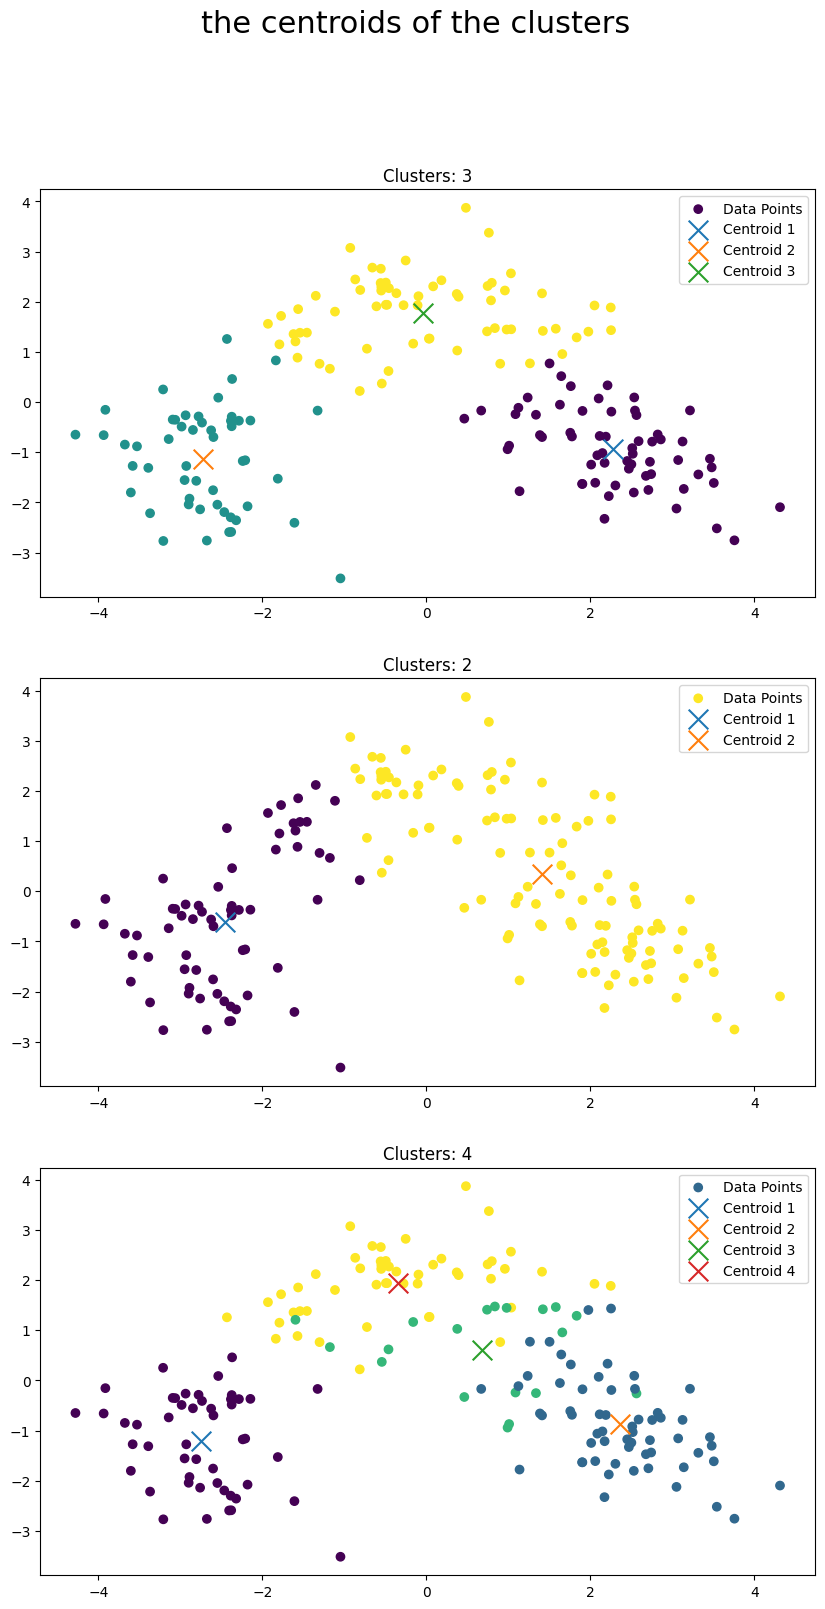

In [12]:
import matplotlib.colors as col
sil_kmean = []

for n in range(2, 11):
 
    kmeans = KMeans(n_clusters=n, n_init=10).fit(stan_wine)
    predictions = kmeans.predict(stan_wine)

    # Evaluation with Silhouette Score
    silhouette_avg = silhouette_score(stan_wine, predictions)

    # Transform data to the PCA space
    data_pca = pca.transform(stan_wine)

     # Get the centroids in the original space
    centroids_original = kmeans.cluster_centers_

    # Transform centroids to the PCA space
    centroids_pca = pca.transform(centroids_original)

    sil_kmean.append({
        'NumClusters': n,
        'SilhouetteScore': silhouette_avg,
        'Predictions': predictions,
        'Centroids': centroids_pca,
        'PCAData' : data_pca
    })

# sort using Silhouette Score
sil_kmean = sorted(sil_kmean, key=lambda y: y['SilhouetteScore'], reverse=True)[:3]

#Define a list of colors
centroid_colors = list(col.TABLEAU_COLORS.values())

#visualise the first two PCA components and

plt.figure(figsize=(10, 18))
for idx, res in enumerate(sil_kmean, 1):
    plt.subplot(3, 1, idx)
    plt.scatter(res['PCAData'][:, 0], res['PCAData'][:, 1], c=res['Predictions'], cmap='viridis', label='Data Points')
    
     # Plot each centroid individually
    for i, centroid in enumerate(res['Centroids']):
        plt.scatter(centroid[0], centroid[1], marker='x', s=200, color=centroid_colors[i], label=f'Centroid {i + 1}')

    plt.title(f"Clusters: {res['NumClusters']}")
    
    plt.legend()


plt.suptitle('the centroids of the clusters', fontsize=22)
plt.show()

In k-means clustering, centroids must be transformed to the PCA space because the algorithm operates in the original feature space. PCA is applied to reduce dimensionality. The positions of centroids in the PCA space offer a meaningful representation of clusters. A scatter plot with these transformed centroids visually assesses cluster separation and accurately depicts their positions in the reduced-dimensional space.

### Part 4 (BONUS): Filling in missing labels using clustering

In this bonus exercise, you're given a dataset with almost all of the labels are missing. This is the starting point in semi-supervised learning. Semi-supervised learning in general is beyond the scope of this course, but if you want you can learn more about it, starting e.g. on [the sklearn page for semi-supervised learning](https://scikit-learn.org/stable/modules/semi_supervised.html). **This exercise does not require researching semi-supervised learning, however.**

The dataset used in this exercise is a slightly modified version of [the seeds dataset](https://archive.ics.uci.edu/dataset/236/seeds). The features are different properties of wheat seeds. They are divided to three different classes, simply called `target1`, `target2` and `target3` here. The feature names and their data types are listed in the table below. **Use the modified dataset on Moodle, with the filename `ex3_seeds_missinglabels.csv`**

| Feature | Type 
| :--- | ---: 
| Area | Numeric (float)
| Perimeter | Numeric (float)
| Compactness | Numeric (float)
| Length | Numeric (float)
| Width | Numeric (float)
| Asymmetry Coefficient | Numeric (float)
| Length Groove | Numeric (float)
| Target | Categorical (nominal)

First, visualize the first two principal components of the dataset in a scatter plot, showing the labels real for data points you were given. Try to see if the labels look like they belong in what look like clusters on the plot.

Your task is to use clustering to assign labels to the rows that have an `unknown` value for their label. Do this by first clustering all of the data, and then filling in the unknown values based on which clusters the data points with known values tend to fit in. The details of how exactly you decide which rows get assigned which label are up to you - you can get creative. Describe and justify your thought process, though.

Use whichever clustering methods you prefer. You can cluster the data into 3 clusters because you have 3 known labels, but you could also try a higher number of clusters that you can then merge.

You are also given the full labels for the dataset in a separate file called `ex3_seeds_labels.csv`. Plot the real labels next to the labels that your clustering attempts predicted.

Finally, compute the adjusted Rand index for labels predicted by your clustering solutions and the real labels, and display it along the scatter plots. Rand index is a measure of similarity between two partitions of a set of elements. Adjusted Rand index is corrected for chance using the maximum and expected values of Rand index. Optionally, you can learn more about the Rand index e.g. on [the Wikipedia page for Rand index](https://en.wikipedia.org/wiki/Rand_index). Here you can simply use the `sklearn.metrics.adjusted_rand_score` method imported at the beginning of this notebook.